# p values and confidence intervals
* Notebook completed by Adam Lang
* Date: 4/15/2024
* This notebook will go over p values and confidence intervals and their implementation in python. This was completed as part of the Springboard Data Science Fellowship and LinkedIn Learning course "Python Statistics Essential Training."

Standard Library imports

In [1]:
import math
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# scipy imports
import scipy.stats
import scipy.optimize
import scipy.spatial

# Case Study
* We will go back to the previous Case Study Scenario as follows:
  * A very important election is taking place in the city you live in, you work for the local newspaper and you are asked to poll the local population with a sample size of 1000 people and ask who they will vote for.
  * The candidates for the election are:
      1. "Brown" - incumbent mayor
      2. "Green" - a local chef running against him.

In [2]:
# import poll data
poll = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/poll.csv')


# head of poll data
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [3]:
# get value_counts()
poll.vote.value_counts(normalize=True)

vote
Brown    0.511
Green    0.489
Name: proportion, dtype: float64

#### Null Hypothesis: Green wins the election, true Brown fraction is 0.50 or less.
* We need to find out if the Brown percentage of votes of 0.5111 is an extreme result if the null hypothesis holds.

In [5]:
## simulate sample of 1000 in a dataframe
def sample(brown, n=1000):
  return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [6]:
## 10000 samples
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

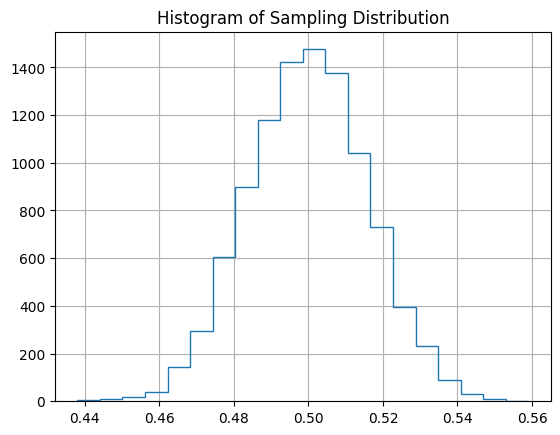

In [7]:
# plot histogram
dist.Brown.hist(histtype='step',bins=20)
plt.title('Histogram of Sampling Distribution');

#### What is the p value?

In [8]:
100 - scipy.stats.percentileofscore(dist.Brown, 0.511)

24.254999999999995

Result: p value is 24.5%! This is not enough to reject the null hypothesis.

#### What about the larger poll data? Can this help us reject the null hypothesis?

In [9]:
## load large poll data
largepoll = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/poll-larger.csv')

In [10]:
## view value_counts()
largepoll.vote.value_counts(normalize=True)

vote
Green    0.5181
Brown    0.4819
Name: proportion, dtype: float64

In [11]:
## compute sampling distribution at fraction of 50% this time for Green
## will take longer so compute only 10,000 reps
dist = pd.DataFrame({'Green': [sample(0.50, 10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]
})


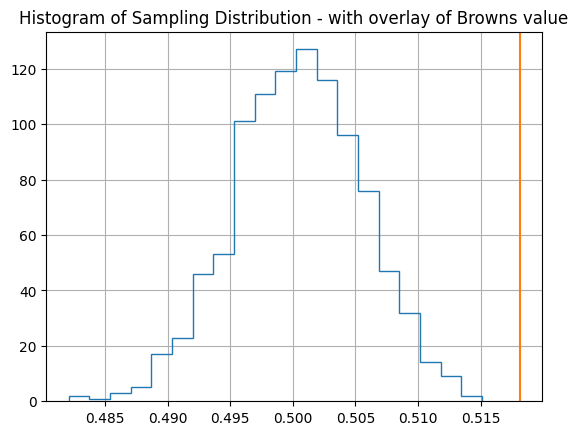

In [13]:
## plot histogram
dist.Green.hist(histtype='step', bins=20)
plt.axvline(0.5181, c='C1')
plt.title('Histogram of Sampling Distribution - with overlay of Browns value');

Summary:
* Brown's value is so extreme its not even within our sampling distribution! We can conclude that the p value of whether Brown wins or ties is 1/1000 or less, which is VERY significant.

# Bootstrapping p values and confidence intervals

In [14]:
# load grades dataset
pop = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/grades.csv')

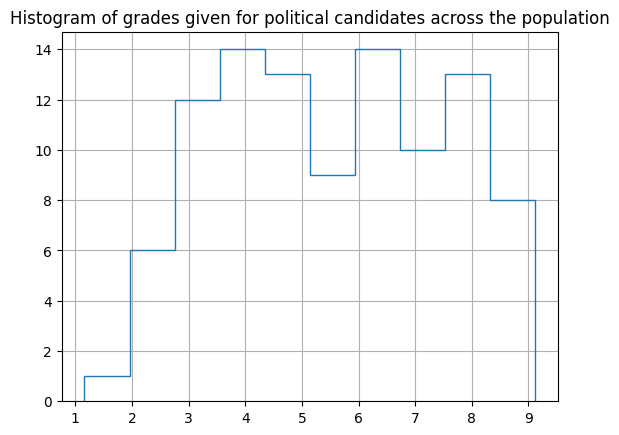

In [16]:
# plot histogram
pop.grade.hist(histtype='step')
plt.title('Histogram of grades given for political candidates across the population');

In [17]:
scipy.stats.percentileofscore(pop.grade,5)

43.0

## Build a bootstrap sample

In [18]:
bootstrap = pd.DataFrame({'passing': [scipy.stats.percentileofscore(pop.sample(100,replace=True).grade,5) for i in range(1000)]})

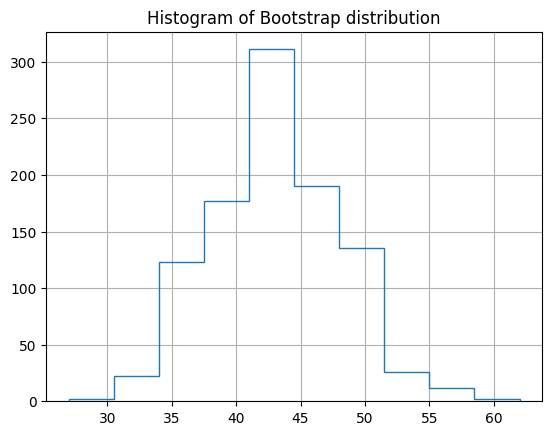

In [19]:
## histogram bootstrap distribution
bootstrap.passing.hist(histtype='step')
plt.title('Histogram of Bootstrap distribution');

In [20]:
## look at quantiles
bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(34.0, 53.0)

Summary:
* The 95% confidence interval is 33 to 53% for the percentage of citizens who think the mayor is failing at their job.
* Overall she very likely has the support of the majority of citizens.